# Gradient Descent Graph

## Gradient Descent 그래프를 그려보자.

Y = X * W 값을 충족하기 위해, (W값을 조정하며) 최적의 W를 찾는 것이 목표이다.


$$cost(W) = \frac{1}{m}\sum_{k=1}^m{({Wx^i - y^i})^2}$$

In [88]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [2, 4, 6]

W = tf.placeholder(tf.float32)
hypothesis = X * W

In [89]:
cost = tf.reduce_mean(tf.square(hypothesis - Y)) 

In [45]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [92]:
W_val = []
cost_val = []
for i in range(-30, 60):
    feed_W = i * 0.1
    cur_cost, cur_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(cur_W)
    cost_val.append(cur_cost)

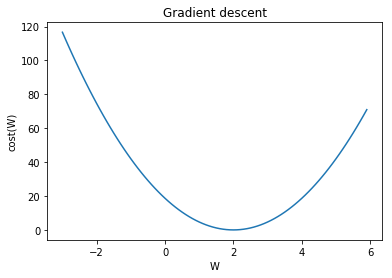

In [93]:
plt.plot(W_val, cost_val)
plt.title('Gradient descent')
plt.xlabel('W')
plt.ylabel('cost(W)')
plt.show()

## W를 찾아보자

$$W := W - a\frac{1}{m}\sum_{k=1}^m{({Wx^i - y^i})x^i}$$
a는 learning_rate를 의미한다.

### fuctions
- [tf.Variable](https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/how_tos/variables/)

In [95]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight') # todo: random_normal?
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W
cost = tf.reduce_sum(tf.square(hypothesis - Y))

In [96]:
# 수식 직접 계산
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

In [97]:
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # TODO: 여기서 하는 일은?
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
    

(0, 14.055502, array([-0.00198025], dtype=float32))
(1, 3.9980094, array([0.46561053], dtype=float32))
(2, 1.1372116, array([0.7149923], dtype=float32))
(3, 0.32347342, array([0.8479959], dtype=float32))
(4, 0.092010215, array([0.9189311], dtype=float32))
(5, 0.02617181, array([0.95676327], dtype=float32))
(6, 0.007444436, array([0.9769404], dtype=float32))
(7, 0.0021175225, array([0.98770154], dtype=float32))
(8, 0.00060232455, array([0.9934408], dtype=float32))
(9, 0.0001713279, array([0.99650174], dtype=float32))
(10, 4.8732705e-05, array([0.99813426], dtype=float32))
(11, 1.3862767e-05, array([0.9990049], dtype=float32))
(12, 3.9432884e-06, array([0.9994693], dtype=float32))
(13, 1.1218422e-06, array([0.99971694], dtype=float32))
(14, 3.191774e-07, array([0.999849], dtype=float32))
(15, 9.075303e-08, array([0.9999195], dtype=float32))
(16, 2.587122e-08, array([0.999957], dtype=float32))
(17, 7.3341653e-09, array([0.9999771], dtype=float32))
(18, 2.0946125e-09, array([0.9999878], dt

## [tf.train.GradientDescentOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer)을 이용해보자!

굳이 매번 update하고, gradient와 미분을 매번 해주지 않아도 된다.

In [98]:
X = [1, 2, 3]
Y = [1, 2, 3]

# -5.0으로 initialize. 말도 안되는 값으로 설정해두면 W가 제 값을 찾아갈까?
W = tf.Variable(-5.0)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

In [100]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(20):
    print(step, sess.run(W))
    sess.run(train)

(0, -5.0)
(1, 0.5999999)
(2, 0.97333336)
(3, 0.99822223)
(4, 0.9998815)
(5, 0.9999921)
(6, 0.99999946)
(7, 1.0)
(8, 1.0)
(9, 1.0)
(10, 1.0)
(11, 1.0)
(12, 1.0)
(13, 1.0)
(14, 1.0)
(15, 1.0)
(16, 1.0)
(17, 1.0)
(18, 1.0)
(19, 1.0)
